In [1]:
import pickle 

import numpy as np 
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

matplotlib.rcParams['font.size'] = 17
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

%matplotlib inline

## Import and Wrangle

In [2]:
#create function to reduce size of dataferame
def reduce_size(df):
    columns = df.columns.to_list()
    for col in columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int8')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float64')
        elif df[col].dtype == 'object':
            df[col] = df[col].astype('category') 
        
    return df

In [3]:
# creat a function to treat outliers
def outliers(df):
    loop = 0
    cols = df.select_dtypes('number').drop(columns = ['latitude','longitude']).columns
    for col in cols:
        q1, q9 = df[col].quantile([0.10, 0.90])
        mask = df[col].between(q1,q9)
        df_mask = df[mask]
        df[col] = df_mask[col]
        loop += 1
        if loop == len(cols):
            break
    #print(loop)
    return df

In [4]:
#create a wrangle function
def wrangle(filepath):
    
    #import data
    df = pd.read_csv(filepath).set_index('Customer ID')
    
    #apply reduce_size function to reduce size of dtypes
    reduce_size(df)
    
    #lowercase columns
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    
    #drop columns (that having 'Nan' values more than 50%)
    nan_cols = [col for col in df.columns if  df[col].isna().sum()/len(df) > 0.49]
    df.drop(columns = nan_cols, inplace = True)
    
    #leaky features
    df.drop(columns = ['city'], inplace = True)

    #multicolinarity cols
    df.drop(columns = ['total_revenue', 'total_charges', 'total_long_distance_charges'], inplace = True)
    
    #outliers treatments apply outliers fuction
    outliers(df)
    
    
    return df

In [5]:
#load data
df = wrangle('telecom_customer_churn.csv')
data = df.copy()
data.head()

,gender,age,married,number_of_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,...,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_refunds,total_extra_data_charges,customer_status
Customer ID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,37.0,Yes,0.0,41.0,34.827662,-118.999073,2.0,9.0,None,...,No,No,Yes,One Year,Yes,Credit Card,65.6,0.0,0.0,Stayed
0003-MKNFE,Male,46.0,No,0.0,70.0,34.162515,-118.203869,0.0,9.0,None,...,Yes,Yes,No,Month-to-Month,No,Credit Card,NaN,NaN,NaN,Stayed
0004-TLHLJ,Male,50.0,No,0.0,-45.0,33.645672,-117.922613,0.0,4.0,Offer E,...,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,0.0,0.0,Churned
0011-IGKFF,Male,NaN,Yes,0.0,89.0,38.014457,-122.115432,1.0,13.0,Offer D,...,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,0.0,0.0,Churned
0013-EXCHZ,Female,NaN,Yes,0.0,82.0,34.227846,-119.079903,3.0,3.0,None,...,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,0.0,0.0,Churned


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             7043 non-null   category
 1   age                                5734 non-null   float64 
 2   married                            7043 non-null   category
 3   number_of_dependents               6500 non-null   float64 
 4   zip_code                           5685 non-null   float64 
 5   latitude                           7043 non-null   float64 
 6   longitude                          7043 non-null   float64 
 7   number_of_referrals                6367 non-null   float64 
 8   tenure_in_months                   5779 non-null   float64 
 9   offer                              7043 non-null   category
 10  phone_service                      7043 non-null   category
 11  avg_monthly_long_distance_charges

In [7]:
data.isna().sum()/len(data) > 0.49

gender                               False
age                                  False
married                              False
number_of_dependents                 False
zip_code                             False
latitude                             False
longitude                            False
number_of_referrals                  False
tenure_in_months                     False
offer                                False
phone_service                        False
avg_monthly_long_distance_charges    False
multiple_lines                       False
internet_service                     False
internet_type                        False
avg_monthly_gb_download              False
online_security                      False
online_backup                        False
device_protection_plan               False
premium_tech_support                 False
streaming_tv                         False
streaming_movies                     False
streaming_music                      False
unlimited_d

In [8]:
cols = [col for col in data.columns if  data[col].isna().sum()/len(data) > 0.49]

In [9]:
cols

[]

<AxesSubplot:>

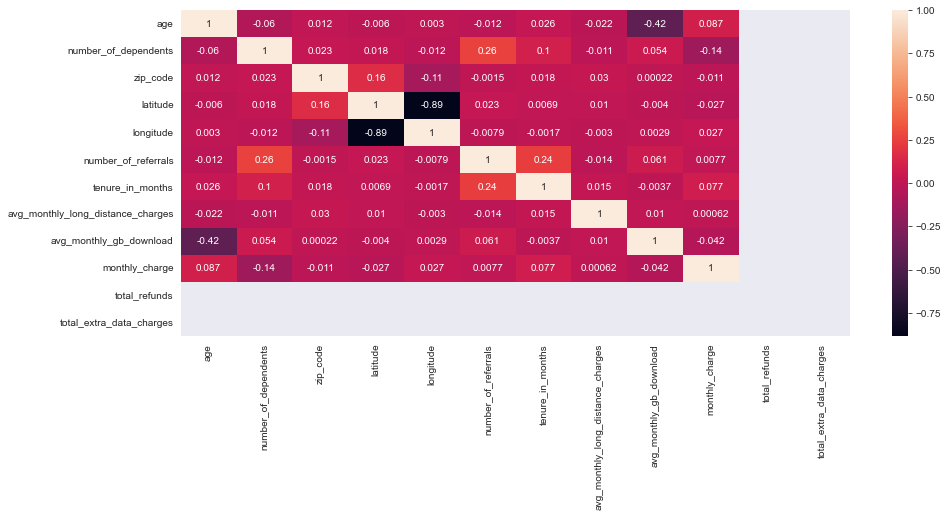

In [10]:
plt.figure(figsize = (15, 6))
sns.heatmap(data.corr(), annot = True)

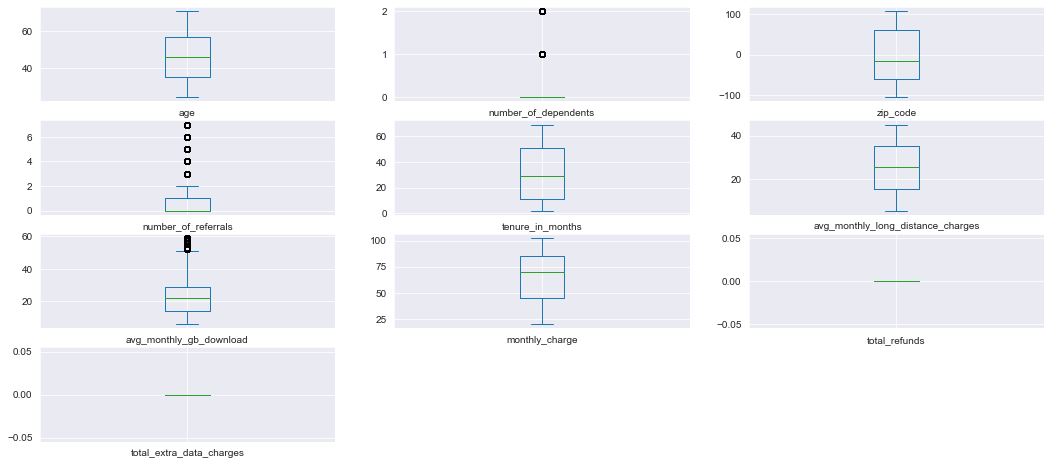

In [11]:
df_box = data.select_dtypes('number').drop(columns = ['latitude','longitude']).copy()
df_box.plot(kind='box',subplots=True, layout=(4,3),figsize=(18,8));

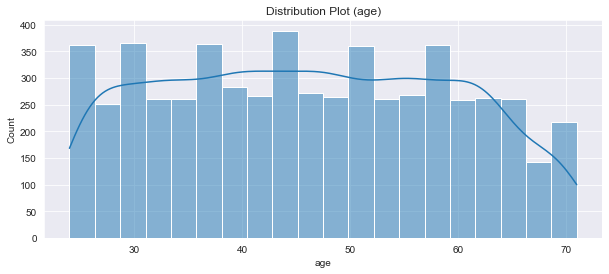

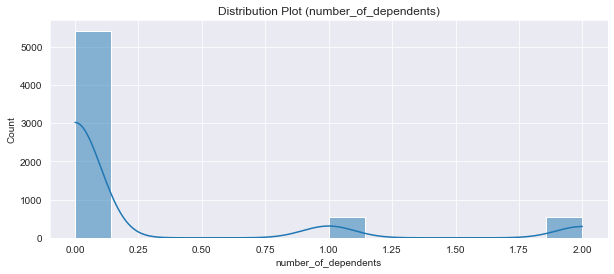

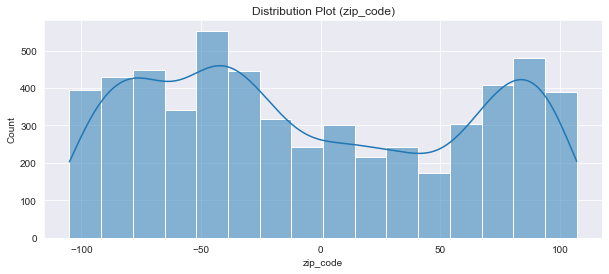

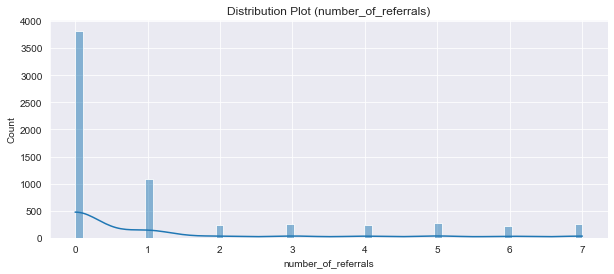

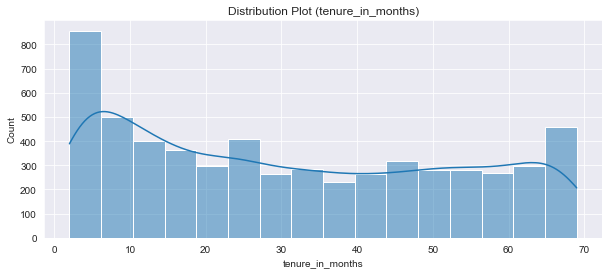

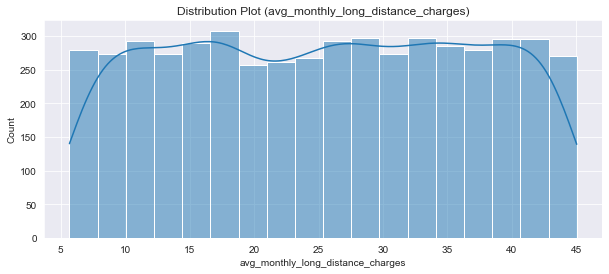

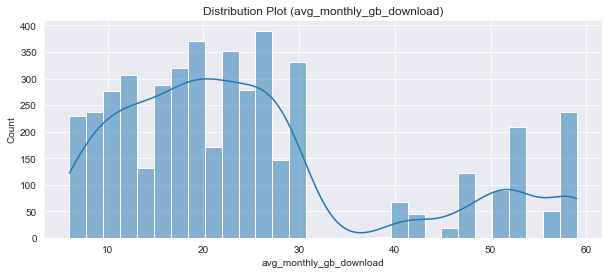

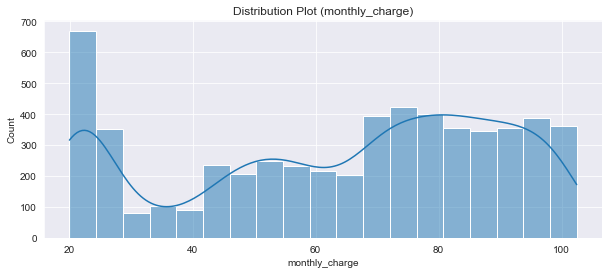

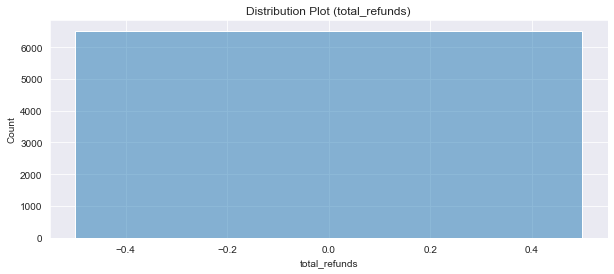

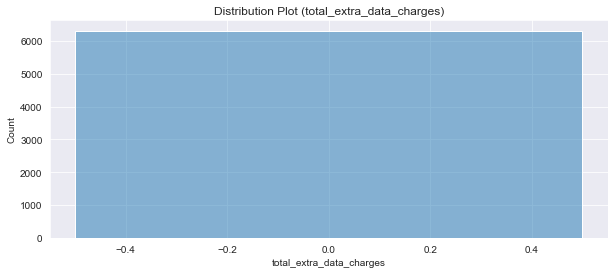

In [12]:
for col in df_box.columns:
    plt.subplots(figsize = (10,4))
    sns.histplot(x = data[col] , data = data, kde=True)
    plt.title('Distribution Plot'+ ' ' + '(' +col+')')

In [13]:
#df_box.plot(kind='hist',subplots=True, layout=(4,3),figsize=(18,8));

In [14]:
data.customer_status.value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: customer_status, dtype: int64

# Split

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [16]:
#select X and y
X = data.drop('customer_status', axis = 1)
y = data.customer_status

print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (7043, 30)
y Shape: (7043,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (5282, 30)
X_test Shape: (1761, 30)
y_train Shape: (5282,)
y_test Shape: (1761,)


In [18]:
y_train.value_counts()

Stayed     3542
Churned    1409
Joined      331
Name: customer_status, dtype: int64

**`Resample`**

In [19]:
#undersampling
under_sampler = RandomUnderSampler(random_state = 42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

print('X_train_under shape:',X_train_under.shape)
print('y_train_under shape:',y_train_under.shape)

X_train_under shape: (993, 30)
y_train_under shape: (993,)


In [20]:
y_train_under.value_counts()

Churned    331
Joined     331
Stayed     331
Name: customer_status, dtype: int64

In [21]:
#Oversampling
over_sampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

print('X_train_over shape:',X_train_over.shape)
print('y_train_over shape:',y_train_over.shape)

X_train_over shape: (10626, 30)
y_train_over shape: (10626,)


In [22]:
y_train_over.value_counts()

Churned    3542
Joined     3542
Stayed     3542
Name: customer_status, dtype: int64

### Model Building

*`Preprocessing`*

In [23]:
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.6706


In [24]:
#fit X_train, y_train
model_reg = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(strategy = 'mean'),
    MinMaxScaler(feature_range=(0, 1)),
    RandomForestClassifier(random_state = 42)
)
model_reg.fit(X_train, y_train)

#fit X_train_under, y_train_under
model_under = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(strategy = 'mean'),
    MinMaxScaler(feature_range=(0, 1)),
    RandomForestClassifier(random_state = 42)
)
model_under.fit(X_train_under, y_train_under)


#fit X_train_under, y_train_under
model_over = make_pipeline(
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(strategy = 'mean'),
    MinMaxScaler(feature_range=(0, 1)),
    RandomForestClassifier(random_state = 42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'married', 'offer',
                                     'phone_service', 'multiple_lines',
                                     'internet_service', 'internet_type',
                                     'online_security', 'online_backup',
                                     'device_protection_plan',
                                     'premium_tech_support', 'streaming_tv',
                                     'streaming_movies', 'streaming_music',
                                     'unlimited_data', 'contract',
                                     'paperless_billing', 'payment_method'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [25]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.8296
Training Accuracy: 0.7849
Test Accuracy: 0.7297
Training Accuracy: 1.0
Test Accuracy: 0.8149


In [26]:
importance = model_reg.named_steps['randomforestclassifier'].feature_importances_
importance

array([0.00935078, 0.00887253, 0.04761766, 0.00927947, 0.009609  ,
       0.02162458, 0.04757834, 0.05135606, 0.05072501, 0.05453408,
       0.10727819, 0.00630064, 0.00583984, 0.00995153, 0.00303361,
       0.00177755, 0.02821872, 0.00224742, 0.00224579, 0.04619171,
       0.00791176, 0.00765861, 0.00240451, 0.00184446, 0.00155646,
       0.0142171 , 0.00744977, 0.00117403, 0.00399774, 0.03506939,
       0.02062021, 0.00795724, 0.0014135 , 0.00940602, 0.00087749,
       0.00673017, 0.00948919, 0.00134277, 0.00594853, 0.0261926 ,
       0.00712576, 0.00203359, 0.0063266 , 0.00248057, 0.00666849,
       0.00551892, 0.00550882, 0.0010804 , 0.00600695, 0.00109018,
       0.00652507, 0.00547976, 0.00145715, 0.00530029, 0.08839573,
       0.01996404, 0.03708298, 0.00862833, 0.00813451, 0.00958402,
       0.01223427, 0.00513309, 0.05134644, 0.        , 0.        ])

In [27]:
features = model_reg.named_steps['onehotencoder'].get_feature_names()

In [28]:
feat_imp = pd.Series(importance, index = features).sort_values()
feat_imp.tail(10)

contract_Two Year                    0.037083
avg_monthly_long_distance_charges    0.046192
zip_code                             0.047578
age                                  0.047618
longitude                            0.050725
monthly_charge                       0.051346
latitude                             0.051356
number_of_referrals                  0.054534
contract_Month-to-Month              0.088396
tenure_in_months                     0.107278
dtype: float64

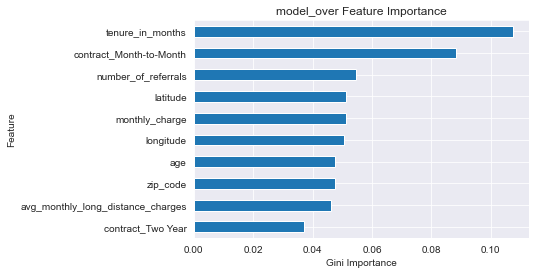

In [29]:
# Plot series
feat_imp.tail(10).plot(kind = 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
params = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
    'randomforestclassifier__max_features': ['sqrt', 'log2'],
    'randomforestclassifier__min_samples_leaf': range(10,60, 10),
    'randomforestclassifier__n_estimators': range(100, 600, 100),
    'randomforestclassifier__max_depth': range(1, 60, 10),
    'randomforestclassifier__max_leaf_nodes': range(2, 10)
}

In [32]:
#clf = GridSearchCV(model, params, cv = 5, n_jobs = -1, verbose = 1)

In [33]:
randomized = RandomizedSearchCV(model_reg, param_distributions = params, 
                                cv = 5,  random_state = 42)

In [34]:
randomized.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('onehotencoder',
                                              OneHotEncoder(cols=['gender',
                                                                  'married',
                                                                  'offer',
                                                                  'phone_service',
                                                                  'multiple_lines',
                                                                  'internet_service',
                                                                  'internet_type',
                                                                  'online_security',
                                                                  'online_backup',
                                                                  'device_protection_plan',
                                                                  'premium_tech_support',
                                                                  'streaming_tv',
                                                                  'streaming_movies',
                                                                  'streaming_music',
                                                                  'unlimited_data',
                                                                  'contract',
                                                                  'paper...
                   param_distributions={'randomforestclassifier__max_depth': range(1, 60, 10),
                                        'randomforestclassifier__max_features': ['sqrt',
                                                                                 'log2'],
                                        'randomforestclassifier__max_leaf_nodes': range(2, 10),
                                        'randomforestclassifier__min_samples_leaf': range(10, 60, 10),
                                        'randomforestclassifier__n_estimators': range(100, 600, 100),
                                        'simpleimputer__strategy': ['mean',
                                                                    'median',
                                                                    'most_frequent']},
                   random_state=42)

In [35]:
randomized.score(X_test, y_test)

0.787052810902896

In [36]:
results = pd.DataFrame(randomized.cv_results_).sort_values('rank_test_score')
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_simpleimputer__strategy,param_randomforestclassifier__n_estimators,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__max_leaf_nodes,param_randomforestclassifier__max_features,param_randomforestclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,1.249663,0.047763,0.100702,0.010709,mean,400,10,9,sqrt,41,"{'simpleimputer__strategy': 'mean', 'randomfor...",0.766320,0.788079,0.795455,0.771780,0.794508,0.783228,0.011977,1
2,0.895154,0.015010,0.073632,0.003095,mean,300,40,7,sqrt,41,"{'simpleimputer__strategy': 'mean', 'randomfor...",0.765374,0.777673,0.788826,0.762311,0.790720,0.776980,0.011657,2
1,0.701949,0.023401,0.065535,0.006179,most_frequent,200,50,9,sqrt,41,"{'simpleimputer__strategy': 'most_frequent', '...",0.769158,0.786187,0.783144,0.766098,0.775568,0.776031,0.007744,3
3,0.427936,0.004817,0.045385,0.001793,median,100,20,7,sqrt,41,"{'simpleimputer__strategy': 'median', 'randomf...",0.754021,0.765374,0.770833,0.752841,0.771780,0.762970,0.008098,4
6,0.629119,0.059285,0.060852,0.001411,median,200,30,6,log2,41,"{'simpleimputer__strategy': 'median', 'randomf...",0.744560,0.763482,0.765152,0.749053,0.757576,0.755964,0.008017,5


In [37]:
# Extract best hyperparameters
print(randomized.best_params_)
print(randomized.best_score_)
print(randomized.best_estimator_)

{'simpleimputer__strategy': 'mean', 'randomforestclassifier__n_estimators': 400, 'randomforestclassifier__min_samples_leaf': 10, 'randomforestclassifier__max_leaf_nodes': 9, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 41}
0.7832283334766778
Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'married', 'offer',
                                     'phone_service', 'multiple_lines',
                                     'internet_service', 'internet_type',
                                     'online_security', 'online_backup',
                                     'device_protection_plan',
                                     'premium_tech_support', 'streaming_tv',
                                     'streaming_movies', 'streaming_music',
                                     'unlimited_data', 'contract',
                                     'paperless_billing', 'payment_method'],
                               use_cat

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

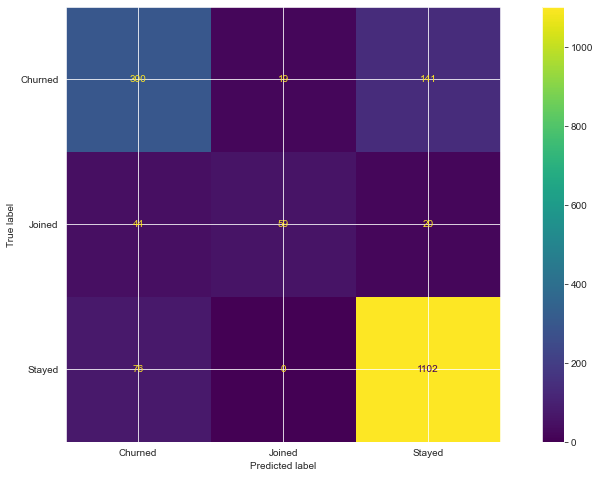

In [41]:
# Plot confusion matrix - model_reg
plt.rcParams['figure.figsize'] = (15,8)
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test)
plt.show()

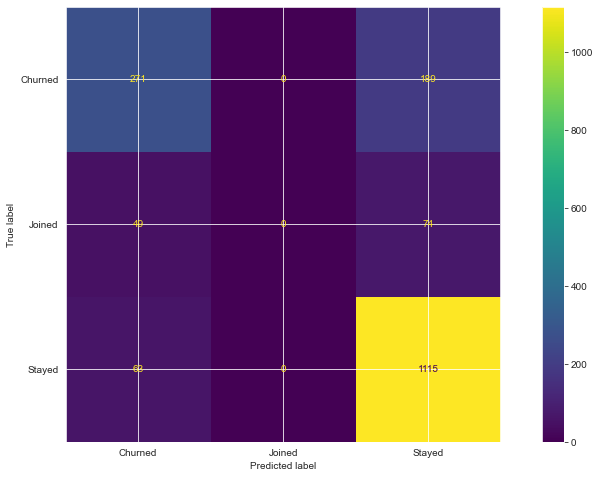

In [42]:
# Plot confusion matrix - randomized
plt.rcParams['figure.figsize'] = (15,8)
ConfusionMatrixDisplay.from_estimator(randomized, X_test, y_test)
plt.show()

In [38]:
#data.to_parquet('churn_gradient.parquet')